In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils import clip_grad_norm_
from torch.autograd import Variable
from torchsummary import summary

from torchvision.utils import save_image
from IPython.core.display import Image, display

import numpy as np
import matplotlib.pyplot as plt
from VAE.model import *
from VAE.data import *
from MDN_RNN.model import *

/tmp/ipykernel_169696/103143013.py:9: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import Image, display


device cuda is ready


In [3]:
z = np.load("Z.npy")
print(z.shape)
z = torch.from_numpy(z)

(35, 32, 32, 4, 4)


In [4]:
vae = VAE(32, batch_size=1).to(DEVICE)
vae.load_state_dict(torch.load('/home/qwest/project/PycharmProjects/Reinforsment_Learning/VAE/MARIO.pt', weights_only=True))
vae.eval()

VAE(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2), bias=False)
    (3): LeakyReLU(negative_slope=0.2, inplace=True)
    (4): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2), bias=False)
    (5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.2, inplace=True)
    (7): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2), bias=False)
    (8): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): LeakyReLU(negative_slope=0.2, inplace=True)
    (10): Conv2d(512, 64, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1), bias=False)
    (11): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(32, 512, kernel_size=(4, 4), 

In [5]:
z.size()

torch.Size([35, 32, 32, 4, 4])

In [6]:
z = z.view(35, -1, 512)
z.size()

torch.Size([35, 32, 512])

In [7]:
zsize=512
nhidden=256

In [8]:
model = V(zsize, nhidden).to(DEVICE)
model

V(
  (lstm): LSTM(512, 256, batch_first=True)
  (linear): Linear(in_features=256, out_features=512, bias=True)
)

In [9]:
seqlen=16

In [10]:
z.shape

torch.Size([35, 32, 512])

In [11]:
train_RNN(epochs=500, seqlen=seqlen, model=model, z=z)

Epoch [1/500], Loss: 0.1290
Epoch [51/500], Loss: 0.0532
Epoch [101/500], Loss: 0.0455
Epoch [151/500], Loss: 0.0392
Epoch [201/500], Loss: 0.0316
Epoch [251/500], Loss: 0.0261
Epoch [301/500], Loss: 0.0219
Epoch [351/500], Loss: 0.0189
Epoch [401/500], Loss: 0.0173
Epoch [451/500], Loss: 0.0164


In [46]:
zero = np.random.randint(z.size(1))
one = np.random.randint(z.size(1))
z_in = z[zero:zero+1, one:one+1, :].to(DEVICE)
z_next = z[zero:zero+1, one+1:one+2, :]

hidden = model.init_hidden(1)
z_next_pred = model(z_in, hidden)[0]

a = z_next_pred[0][0].view(32, 4, 4)
b = z_in[0][0].view(32, 4, 4).unsqueeze(0).to(DEVICE)
c = z_next[0][0].view(32, 4, 4).unsqueeze(0).to(DEVICE)

a1 =vae.decoder(a.unsqueeze(0).to(DEVICE)).detach().cpu().numpy().transpose(0, 2, 3, 1)
b1 =vae.decoder(b).detach().cpu().numpy().transpose(0, 2, 3, 1)
c1 =vae.decoder(c).detach().cpu().numpy().transpose(0, 2, 3, 1)
#img = vae.decoder(a.unsqueeze(0).to(DEVICE)).detach().cpu().numpy().transpose(0, 2, 3, 1)

#plt.imshow(img[0])\

# compare_x = vae.decode(z_out)
#save_image(compare_x.data.cpu(), 'sample_image.png')
#print("Current Frame\t\t\t\t", "Next Frame\t\t\t", "Next Frame Prediction")
#display(Image('sample_image.png', width=900, unconfined=True))

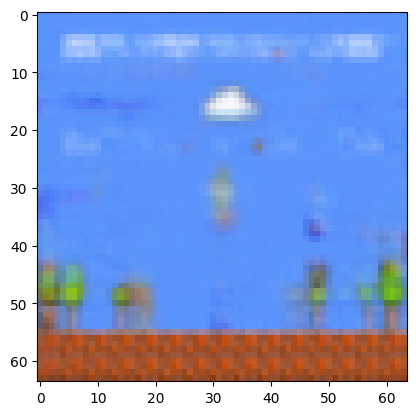

In [47]:
plt.imshow(a1[0])

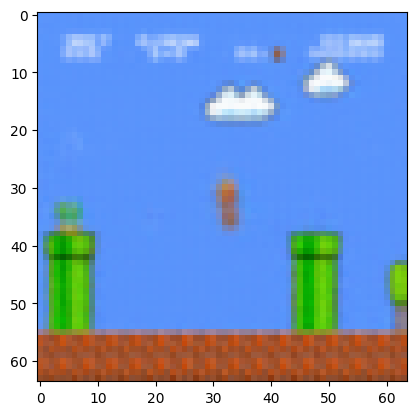

In [48]:
plt.imshow(b1[0])

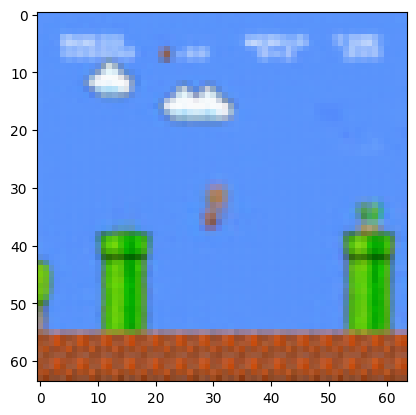

In [49]:
plt.imshow(c1[0])